In [42]:
from fktools import *

from sklearn.model_selection import train_test_split

from dist_metric import DistributionOverlap


from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import KLDivergence
from tensorflow.keras.layers import Input, Dense, Dropout

In [43]:
X = np.load("dataset_denoising_multiple_X.npz")['arr_0']
y = np.load("dataset_denoising_multiple_y.npz")['arr_0']

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f"X train size: {X_train.shape}")
print(f"X test size: {X_test.shape}")

X shape: (58711, 8)
y shape: (58711, 8)
X train size: (46968, 8)
X test size: (11743, 8)


In [44]:
model = Sequential([
    Input(shape=(8,)),

    Dense(256, activation="relu"),
    Dense(256, activation="relu"),
    Dense(256, activation="relu"),
    Dense(256, activation="relu"),
    Dense(256, activation="relu"),
    Dense(256, activation="relu"),

    Dense(8, activation="softmax"),
])

model.compile(
    optimizer = Adam(learning_rate=0.000011),
    loss = KLDivergence(),
    metrics=[DistributionOverlap()],
)

# model learning
history = model.fit(
    X_train,
    y_train,
    epochs = 100,
    batch_size = 32,
    validation_split = 0.2,
)

loss, dist_overlap = model.evaluate(
    X_test,
    y_test,
    verbose=0,
)

Epoch 1/100


2026-01-20 20:21:23.742099: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2026-01-20 20:21:24.382974: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_545', 8 bytes spill stores, 8 bytes spill loads

2026-01-20 20:21:24.447979: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_545', 476 bytes spill stores, 476 bytes spill loads



1175/1175 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - dist_overlap: 0.5549 - loss: 0.6821 - val_dist_overlap: 0.6836 - val_loss: 0.3518
Epoch 2/100
1175/1175 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - dist_overlap: 0.7172 - loss: 0.2884 - val_dist_overlap: 0.7480 - val_loss: 0.2419
Epoch 3/100
1175/1175 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - dist_overlap: 0.7712 - loss: 0.2133 - val_dist_overlap: 0.7865 - val_loss: 0.1976
Epoch 4/100
1175/1175 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - dist_overlap: 0.7917 - loss: 0.1900 - val_dist_overlap: 0.7949 - val_loss: 0.1882
Epoch 5/100
1175/1175 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - dist_overlap: 0.7969 - loss: 0.1841 - val_dist_overlap: 0.7981 - val_loss: 0.1842
Epoch 6/100
1175/1175 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - dist_overlap: 0.7989 - loss: 0.1816 - val_dist_overlap: 0.7993 - val_loss: 0.1838
Epoch 7/100
1175/1175 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - dist_overlap: 0.8002 - loss: 0.1800 - val_dist_overlap: 0.8008 - val_loss: 0.1811
Epoch 8/100
1175/1175 ━━━━━━━━━━━━━━━━━

In [45]:
print(f"test loss: {loss}")
print(f"test overlap: {dist_overlap}")

test loss: 0.16549734771251678
test overlap: 0.8184645175933838


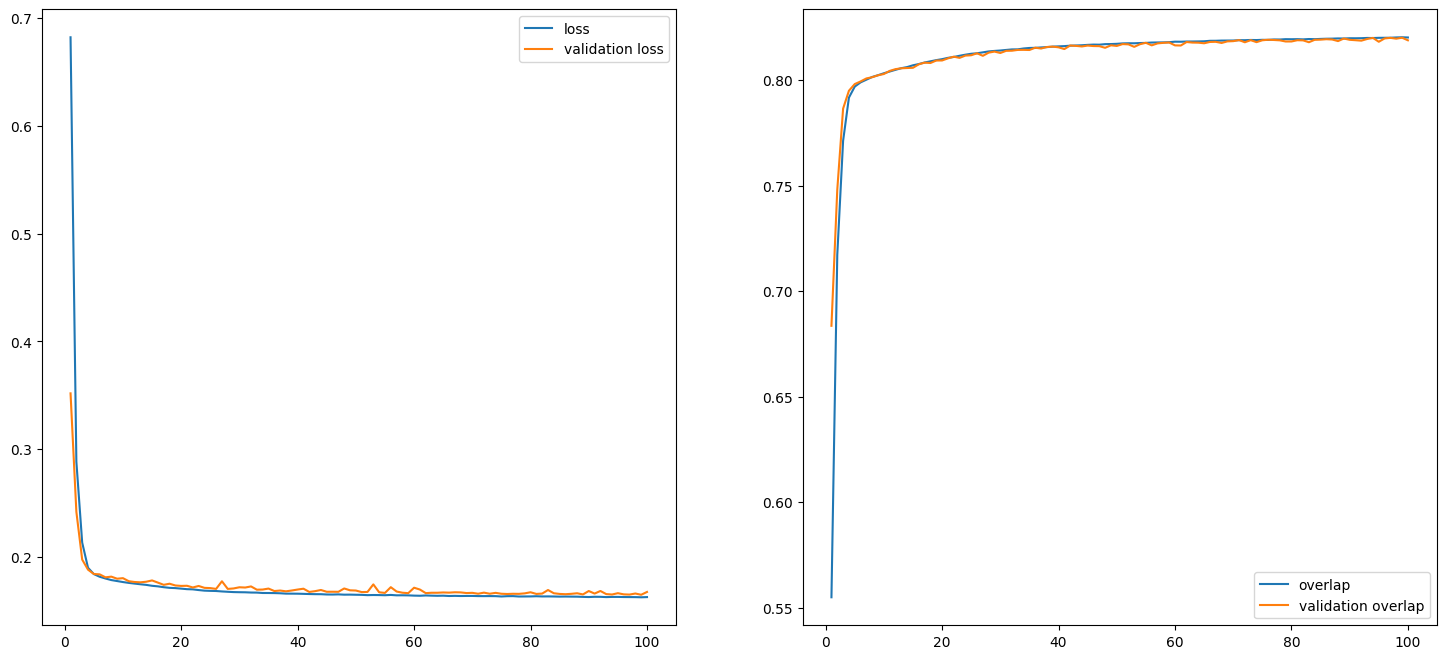

In [46]:
loss = history.history['loss']
acc = history.history['dist_overlap']

val_loss = history.history['val_loss']
val_acc = history.history['val_dist_overlap']

epochs = range(1, len(loss) + 1)

fig, ax = plt.subplots(ncols=2, figsize=(18,8))
ax[0].plot(epochs, loss, label="loss")
ax[0].plot(epochs, val_loss, label="validation loss")
ax[0].legend()
ax[1].plot(epochs, acc, label="overlap")
ax[1].plot(epochs, val_acc, label="validation overlap")
ax[1].legend()